In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
target_col = 'DEATH_EVENT'

In [3]:
data = pd.read_csv('./heart.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.shape

(299, 13)

In [6]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != target_col]
data_y = data[target_col]

In [7]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state = 1)

In [8]:
train_x.shape

(239, 12)

In [9]:
test_x.shape

(60, 12)

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

def test_model(model):
    print('precision_score: {}'.format(round(precision_score(test_y, model.predict(test_x),average = 'macro'), 2)))
    print('recall_score: {}'.format(round(recall_score(test_y, model.predict(test_x),average = 'macro'), 2)))
    print('f1_score: {}'.format(round(f1_score(test_y, model.predict(test_x),average = 'macro'), 2)))

In [11]:
#Случайный лес
from sklearn.ensemble import RandomForestClassifier

random_forest_100 = RandomForestClassifier(n_estimators=50)
random_forest_100.fit(train_x, train_y)

RandomForestClassifier(n_estimators=50)

In [12]:
test_model(random_forest_100)

precision_score: 0.96
recall_score: 0.86
f1_score: 0.9


In [13]:
param_range = np.arange(50,200,5)
tuned_parameters = [{'n_estimators' : param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
         115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
         180, 185, 190, 195])}]

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestClassifier(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="f1_macro",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180, 185, 190, 195])}],
             return_train_score=True, scoring='f1_macro')

In [15]:
reg = gs.best_estimator_

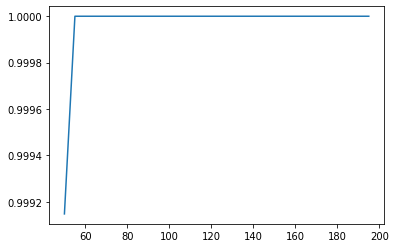

In [16]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

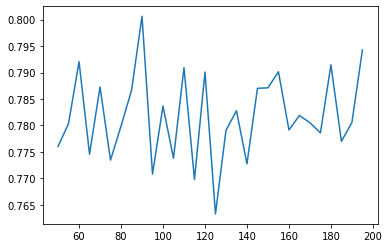

In [17]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [18]:
reg.fit(train_x, train_y)
test_model(reg)

precision_score: 0.86
recall_score: 0.86
f1_score: 0.86


In [19]:
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier

gr_boost_100 = GradientBoostingClassifier(n_estimators=50)
gr_boost_100.fit(train_x, train_y)

GradientBoostingClassifier(n_estimators=50)

In [20]:
test_model(gr_boost_100)

precision_score: 0.72
recall_score: 0.75
f1_score: 0.73


In [21]:
gs = GridSearchCV(GradientBoostingClassifier(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="f1_macro",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180, 185, 190, 195])}],
             return_train_score=True, scoring='f1_macro')

In [22]:
reg = gs.best_estimator_

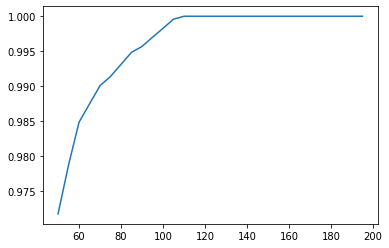

In [23]:
plt.plot(param_range, gs.cv_results_["mean_train_score"])

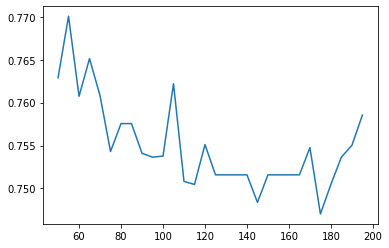

In [24]:
plt.plot(param_range, gs.cv_results_["mean_test_score"])

In [25]:
reg.fit(train_x, train_y)
test_model(reg)

precision_score: 0.72
recall_score: 0.75
f1_score: 0.73


In [26]:
from heamy.estimator import Classifier, Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [27]:
dataset = Dataset(train_x, train_y, test_x)
model_tree = Classifier(dataset=dataset, estimator=DecisionTreeClassifier, name='tree')
model_lr = Classifier(dataset=dataset, estimator=LogisticRegression,name='lr')
model_rf = Classifier(dataset=dataset, estimator=RandomForestClassifier,name='rf')

In [28]:
pipeline = ModelsPipeline(model_tree,model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
stacker = Classifier(dataset=stack_ds, estimator=RandomForestClassifier)
results = stacker.predict()
results = stacker.validate(k=10,scorer=f1_score)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [29]:
from sklearn.metrics import mean_absolute_error
# load boston dataset from sklearn
from sklearn.datasets import load_boston
data = load_boston()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=111)
# create dataset
dataset = Dataset(X_train,y_train,X_test)
# initialize RandomForest & LinearRegression
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
# Stack two models
# Returns new dataset with out-of-fold predictions
pipeline = ModelsPipeline(model_rf,model_lr)
stack_ds = pipeline.stack(k=10,seed=111)
# Train LinearRegression on stacked data (second stage)
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.predict()
# Validate results using 10 fold cross-validation
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [2.4155434015765462, 1.4480099297763127, 2.0448074668937073, 1.9239260282788477, 2.7038490363247867, 2.8129502852924273, 1.62802476559897, 2.585256615474807, 2.4373985528060405, 2.3864402540361254]
Mean accuracy: 2.2386206336058567
Standard Deviation: 0.4351554117612504
Variance: 0.18936023238510336
